Import library


In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [3]:
data = pd.read_csv("C:\\Users\\pcs\\Downloads\\ecommerce_customer_data.csv")
data.head()

,User_ID,Gender,Age,Location,Device_Type,Product_Browsing_Time,Total_Pages_Viewed,Items_Added_to_Cart,Total_Purchases
0,1,Female,23,Ahmedabad,Mobile,60,30,1,0
1,2,Male,25,Kolkata,Tablet,30,38,9,4
2,3,Male,32,Bangalore,Desktop,37,13,5,0
3,4,Male,35,Delhi,Mobile,7,20,10,3
4,5,Male,27,Bangalore,Tablet,35,20,8,2


Check data_type

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   User_ID                500 non-null    int64 
 1   Gender                 500 non-null    object
 2   Age                    500 non-null    int64 
 3   Location               500 non-null    object
 4   Device_Type            500 non-null    object
 5   Product_Browsing_Time  500 non-null    int64 
 6   Total_Pages_Viewed     500 non-null    int64 
 7   Items_Added_to_Cart    500 non-null    int64 
 8   Total_Purchases        500 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 35.3+ KB


Check Null values

In [7]:
data.isnull().sum()

User_ID                  0
Gender                   0
Age                      0
Location                 0
Device_Type              0
Product_Browsing_Time    0
Total_Pages_Viewed       0
Items_Added_to_Cart      0
Total_Purchases          0
dtype: int64

Define statics values

In [17]:
stat_numeric=data.describe()

In [18]:
print(stat_numeric)

          User_ID         Age  Product_Browsing_Time  Total_Pages_Viewed  \
count  500.000000  500.000000             500.000000          500.000000   
mean   250.500000   26.276000              30.740000           27.182000   
std    144.481833    5.114699              15.934246           13.071596   
min      1.000000   18.000000               5.000000            5.000000   
25%    125.750000   22.000000              16.000000           16.000000   
50%    250.500000   26.000000              31.000000           27.000000   
75%    375.250000   31.000000              44.000000           38.000000   
max    500.000000   35.000000              60.000000           50.000000   

       Items_Added_to_Cart  Total_Purchases  
count           500.000000       500.000000  
mean              5.150000         2.464000  
std               3.203127         1.740909  
min               0.000000         0.000000  
25%               2.000000         1.000000  
50%               5.000000         2.00

In [20]:
stat_objeact=data.describe(include='object')

In [21]:
print(stat_objeact)

       Gender Location Device_Type
count     500      500         500
unique      2        8           3
top      Male  Kolkata      Mobile
freq      261       71         178


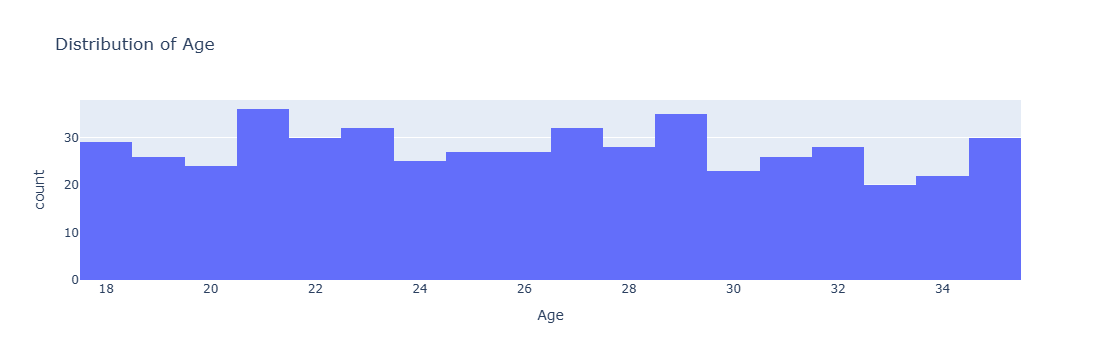

In [29]:
fig = px.histogram(data, x="Age", title='Distribution of Age')
fig.show()

In [35]:
Gender_distribution=data['Gender'].value_counts().reset_index()

In [36]:
print(Gender_distribution)

   Gender  count
0    Male    261
1  Female    239


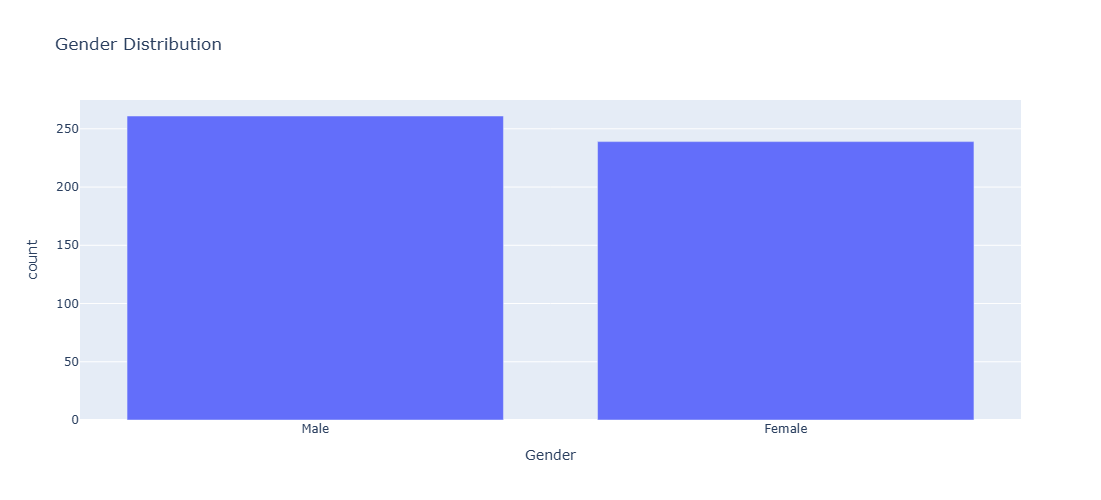

In [38]:
Gender_distribution.columns=["Gender", "count"]
fig=px.bar(Gender_distribution, x='Gender',y="count",title="Gender Distribution",width=500, height=500)
fig.show()

Group_Analysis


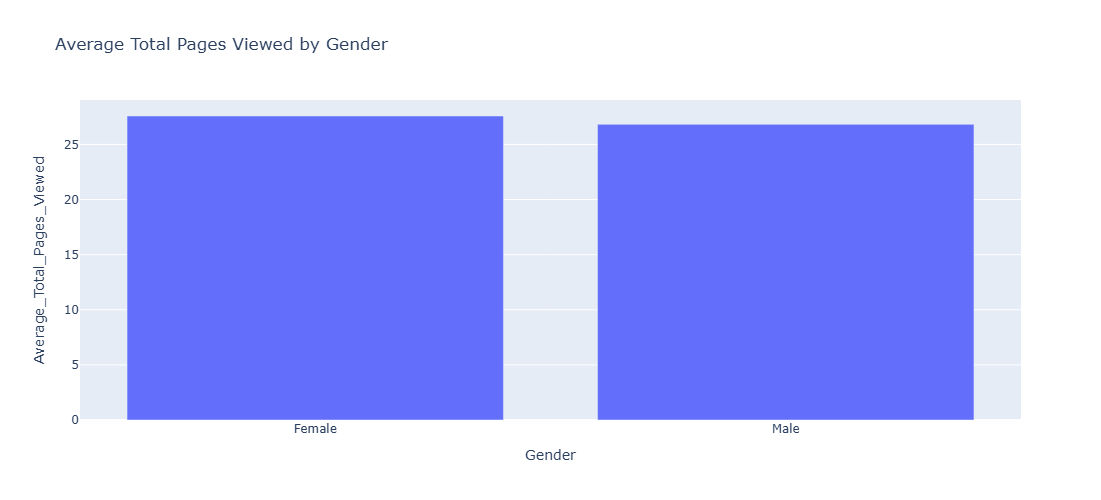

In [41]:
gender_grouped = data.groupby('Gender')['Total_Pages_Viewed'].mean().reset_index()
gender_grouped.columns = ['Gender', 'Average_Total_Pages_Viewed']
fig = px.bar(gender_grouped, x='Gender', y='Average_Total_Pages_Viewed',
             title='Average Total Pages Viewed by Gender',width=500, height=500)
fig.show()

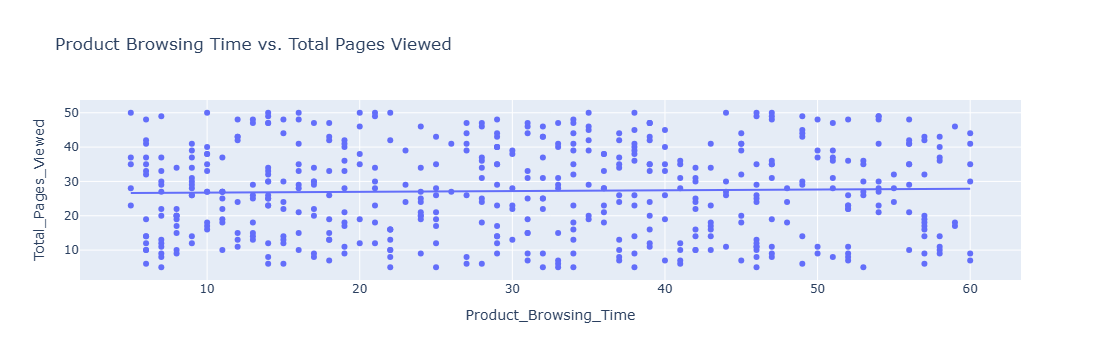

In [42]:
fig = px.scatter(data, x='Product_Browsing_Time', y='Total_Pages_Viewed',
                 title='Product Browsing Time vs. Total Pages Viewed', 
                 trendline='ols')
fig.show()

average total pages viewed by devices:

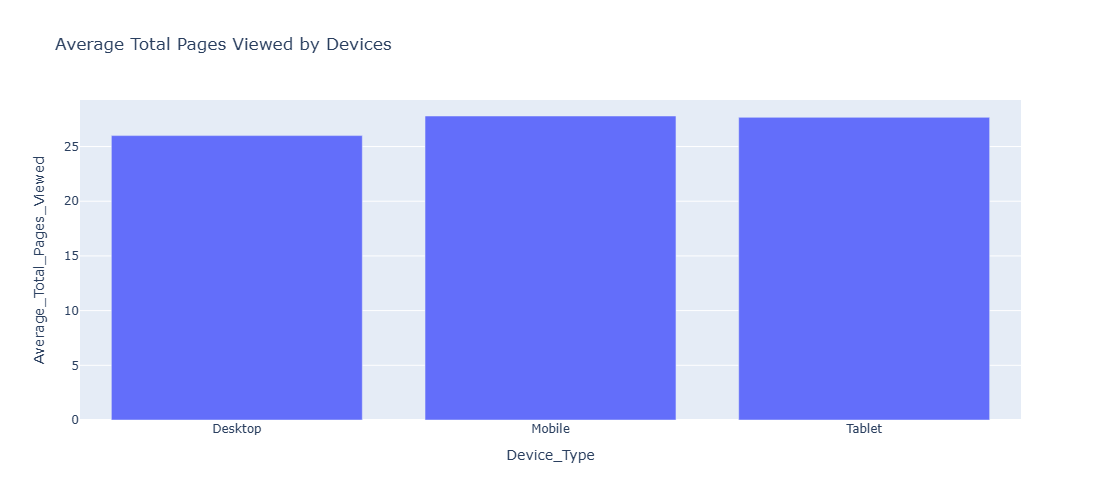

In [44]:
devices_grouped = data.groupby('Device_Type')['Total_Pages_Viewed'].mean().reset_index()
devices_grouped.columns = ['Device_Type', 'Average_Total_Pages_Viewed']
fig = px.bar(devices_grouped, x='Device_Type', y='Average_Total_Pages_Viewed',
             title='Average Total Pages Viewed by Devices',width=500, height=500)
fig.show()

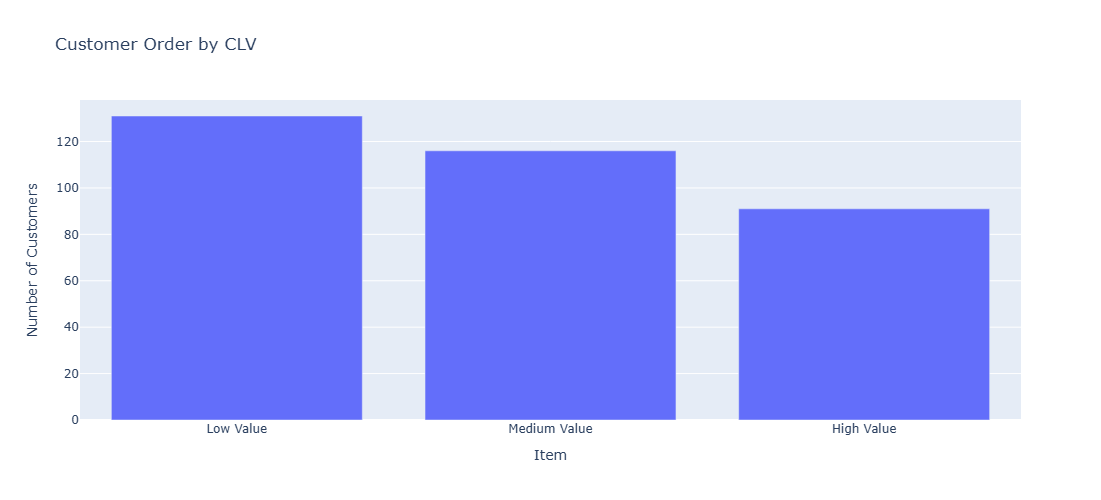

In [47]:
data['CLV'] = (data['Total_Purchases'] * data['Total_Pages_Viewed']) / data['Age']

data['Item'] = pd.cut(data['CLV'], bins=[1, 2.5, 5, float('inf')],
                         labels=['Low Value', 'Medium Value', 'High Value'])

segment_counts = data['Item'].value_counts().reset_index()
segment_counts.columns = ['Item', 'Count']

# Create a bar chart to visualize the customer segments
fig = px.bar(segment_counts, x='Item', y='Count', 
             title='Customer Order by CLV', width=500, height=500)
fig.update_xaxes(title='Item')
fig.update_yaxes(title='Number of Customers')
fig.show()

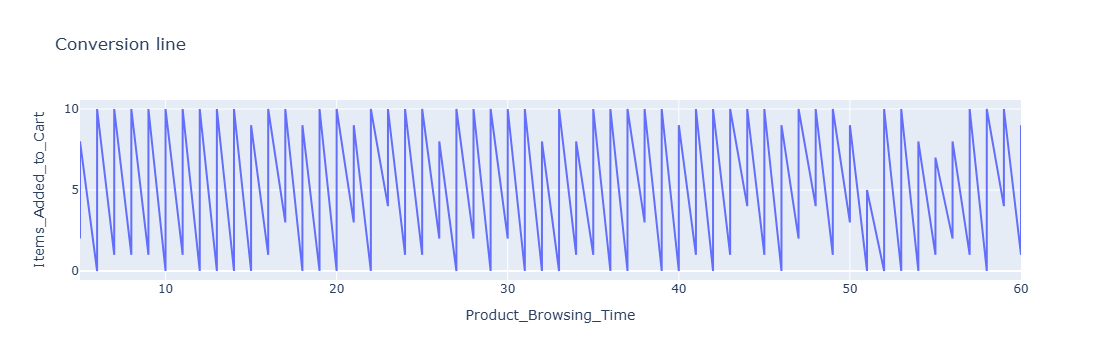

In [49]:
line_data = data[['Product_Browsing_Time', 'Items_Added_to_Cart', 'Total_Purchases']]
line_data = line_data.groupby(['Product_Browsing_Time', 'Items_Added_to_Cart']).sum().reset_index()

fig = px.line(line_data, x='Product_Browsing_Time', y='Items_Added_to_Cart', title='Conversion line')
fig.show()

In [50]:
# Calculate churn rate
data['Churned'] = data['Total_Purchases'] == 0

churn_rate = data['Churned'].mean()
print(churn_rate)

0.198
